# SYSC4906 Assignment 3

**Group Name:** Thao and Riley

**Student names:** Thao-Tran Le-Phuong and Riley MacKinnon

**Student numbers:** 100997443 and 100996542


# Discussion of Solution
Your notebook must begin with **this** text cell containing a description of your solution. In this discussion, include links to any resources that you used in developing your solution. Use proper MarkDown syntax to format your discussion.**This description should be approximately 500 words in length and cover the following:**

1. Which machine learning approach did you use?

2. How did you split your data between training and testing? 
_(e.g. hold-out test, cross-validation, repeated bootstrap samples, etc)_

3. How did you train your classifier?
If you used transfer learning, describe how you did so.

4. How did you estimate your future performance _(worst recall, best precision, overall accuracy)_?

   **Here are our final predictions:**
   1. Building with worst recall:
   2. Building with best precision
   3. Overall accuracy)

5. Discuss the performance of your model. Which buildings did it do the best/worst on and why? What are the strengths and limitations of your method. 

6. What would you have done differently if you had more time?


## prepareModel()
This function should prepare your model for multiple invocations of classifyImage(fname). For example, this function could be used to load a pre-trained model from a URL, where that model is then used by  classifyImage(fname). You should use global variables for any variables initialized by this function.

Runtime of this method is **limited to 5 minutes**, so please don’t retrain your network here. All training should be captured in a pre-trained model to be loaded by this method.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.backend import clear_session
import time

!wget https://github.com/Thao-Tran/sysc4906/blob/master/Assignment%203/models.zip?raw=true
!unzip models.zip?raw=true

HEIGHT = 500
WIDTH = 500
FOLDS = 5

# List of building codes to use throughout notebook.
buildingCodes = ('AA', 'CB', 'CT', 'DT', 'FH', 'HP', 'HS', 'LB', 'MC', 'ME', 'ML', 'PA', 'RB', 'RO', 'SA', 'TB')

def prepareModel():
  global models # Sample global variable that you may populate here.
  models = []
  for fold in range(FOLDS):
    start = time.time()
    json_file = open('models/'+str(fold) + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.load_weights('models/'+str(fold)+'.h5')
    models.append(model)
    print('Loaded model in %d seconds' % (time.time() - start))


Using TensorFlow backend.


--2019-12-03 04:27:05--  https://github.com/Thao-Tran/sysc4906/blob/master/Assignment%203/models.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Thao-Tran/sysc4906/raw/master/Assignment%203/models.zip [following]
--2019-12-03 04:27:05--  https://github.com/Thao-Tran/sysc4906/raw/master/Assignment%203/models.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thao-Tran/sysc4906/master/Assignment%203/models.zip [following]
--2019-12-03 04:27:05--  https://raw.githubusercontent.com/Thao-Tran/sysc4906/master/Assignment%203/models.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:4

## label = classifyImage(fname)
Accepts a filename (e.g. ‘test/ME/testImage1.jpg’) of a square JPG image with size at least 500x500 pixels.
Returns a 2-character label corresponding to the predicted building (see table of labels above)

Any variables initialized by prepareModel() should be declared as global within this function if you want to access them (e.g. a pre-trained model)


In [0]:
from keras.preprocessing import image as kp_image
from keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

def classifyImage(fname):
  global models # Sample global variable that you may populate in prepareModel and use here.

  img = kp_image.load_img(fname, target_size=(HEIGHT, WIDTH))
  x = kp_image.img_to_array(img)  # Convert image to nparray
  x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
  x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
  preds = np.zeros(len(buildingCodes))
  for fold in range(FOLDS):
    print("Predicting class of '{0:s}' using model '{1}'".format(fname,models[fold]))
    preds += models[fold].predict(x)[0]        # Use the model to compute prediction score for each possible class
  preds /= FOLDS
  pred = ''
  score = -1
  for i in range(len(preds)):
    if preds[i] > score:
      pred = buildingCodes[i]
      score = preds[i]
  return pred

## label = worstRecall()
Returns the label of a building that you expect will have to lowest recall, when tested on new images

In [0]:
def worstRecall():
  return buildingCodes[11]


## label = bestPrecision()
Returns the label of a building that you expect will have to highest precision, when tested on new images

In [0]:
def bestPrecision():
  return buildingCodes[8]


##acc_score = estimatedAccuracy()
Returns the accuracy (between [0.0,1.0]) that you expect to achieve across all test images, assuming that each building is equally represented


In [0]:
# Function to return estimated accuracy that will be obtained across all test images
def estimatedAccuracy():
  return 0.64

# Test required functions
_We will replace the text below with our actual test code..._

Loaded model in 9 seconds
Loaded model in 10 seconds
Loaded model in 10 seconds
Loaded model in 11 seconds
Loaded model in 12 seconds
--2019-12-03 04:29:52--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-03 04:29:52--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment3/Images/SampleImages.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment3/Images/SampleImages.zip [following]
--2019-12-03 04:29:53--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/

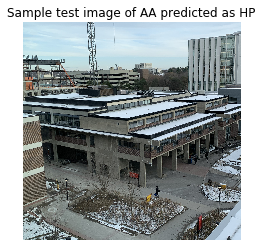

Incorrect...
Predicting class of 'SampleImages/CB_1.jpg' using model '<keras.engine.training.Model object at 0x7f726cefdac8>'
Predicting class of 'SampleImages/CB_1.jpg' using model '<keras.engine.training.Model object at 0x7f726bdca6d8>'
Predicting class of 'SampleImages/CB_1.jpg' using model '<keras.engine.training.Model object at 0x7f726ad2f3c8>'
Predicting class of 'SampleImages/CB_1.jpg' using model '<keras.engine.training.Model object at 0x7f7265cbd400>'
Predicting class of 'SampleImages/CB_1.jpg' using model '<keras.engine.training.Model object at 0x7f7264d5a208>'


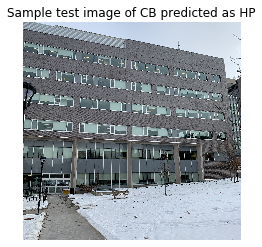

Incorrect...
Predicting class of 'SampleImages/DT_1.jpg' using model '<keras.engine.training.Model object at 0x7f726cefdac8>'
Predicting class of 'SampleImages/DT_1.jpg' using model '<keras.engine.training.Model object at 0x7f726bdca6d8>'
Predicting class of 'SampleImages/DT_1.jpg' using model '<keras.engine.training.Model object at 0x7f726ad2f3c8>'
Predicting class of 'SampleImages/DT_1.jpg' using model '<keras.engine.training.Model object at 0x7f7265cbd400>'
Predicting class of 'SampleImages/DT_1.jpg' using model '<keras.engine.training.Model object at 0x7f7264d5a208>'


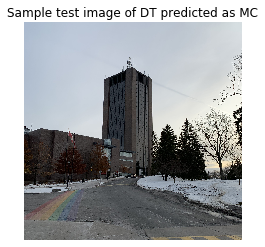

Incorrect...
Predicting class of 'SampleImages/HS_1.jpg' using model '<keras.engine.training.Model object at 0x7f726cefdac8>'
Predicting class of 'SampleImages/HS_1.jpg' using model '<keras.engine.training.Model object at 0x7f726bdca6d8>'
Predicting class of 'SampleImages/HS_1.jpg' using model '<keras.engine.training.Model object at 0x7f726ad2f3c8>'
Predicting class of 'SampleImages/HS_1.jpg' using model '<keras.engine.training.Model object at 0x7f7265cbd400>'
Predicting class of 'SampleImages/HS_1.jpg' using model '<keras.engine.training.Model object at 0x7f7264d5a208>'


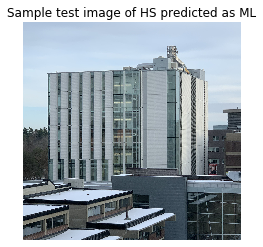

Incorrect...
Expected that worst recall would be on PA
Expected that best precision would be on MC
Expected total accuracy would be 0.640
Actual total accuracy is 0.000


In [0]:
import numpy as np
from PIL import Image, ExifTags
import matplotlib.pyplot as plt
from glob import glob


# First prepare the model:
prepareModel() # Limited to 5 minutes...

# Load (secret) test data into local Colab environment
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment3/Images/SampleImages.zip?raw=true
!unzip SampleImages.zip?raw=true #Should create 4 images
test_images = sorted(glob('SampleImages/*.jpg'))
actual_labels = (buildingCodes[0],buildingCodes[1],buildingCodes[3],buildingCodes[6])

# Classify sample test images:
TP = 0
for imgFname,actual_label in (zip(test_images,actual_labels)):
  pred_label = classifyImage(imgFname) # Predict the label of this image file

  # Plot the image with actual and predicted labels
  # Note that we may have to rotate the image, depending on the 
  # orientation of the camera. Use EXIF tags for this:
  im = Image.open(imgFname)
  for orientation in ExifTags.TAGS.keys() : 
    if ExifTags.TAGS[orientation]=='Orientation' : break 
  exif=dict(im._getexif().items())

  if exif[orientation] == 3 : 
    im=im.rotate(180, expand=True)
  elif exif[orientation] == 6 : 
    im=im.rotate(270, expand=True)
  elif exif[orientation] == 8 : 
    im=im.rotate(90, expand=True)

  im = im.convert('RGB') # May not be necessary?

  plt.title("Sample test image of {0:s} predicted as {1:s}".format(actual_label, pred_label))
  plt.imshow(np.asarray(im))
  plt.axis('off')
  plt.show()

  if (pred_label==actual_label):
    print('Correct!')
    TP += 1
  else:
    print("Incorrect...")

# Print the predicted performance:
print("Expected that worst recall would be on {0:s}".format(worstRecall()))
print("Expected that best precision would be on {0:s}".format(bestPrecision()))
print("Expected total accuracy would be {0:.3f}".format(estimatedAccuracy()))
print("Actual total accuracy is {0:.3f}".format((TP)/(len(test_images))))
